# Importing Dependancies

In [ ]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Import Dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Loading, Preprocessing & EDA

In [ ]:
data = pd.read_csv('/content/Car-mpg-+Dataset.csv')
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [ ]:
#Drop the car name column as it is useless for the model
data = data.drop('car_name', axis=1)
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [ ]:
#Replace 'origin' column with actual continent names
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


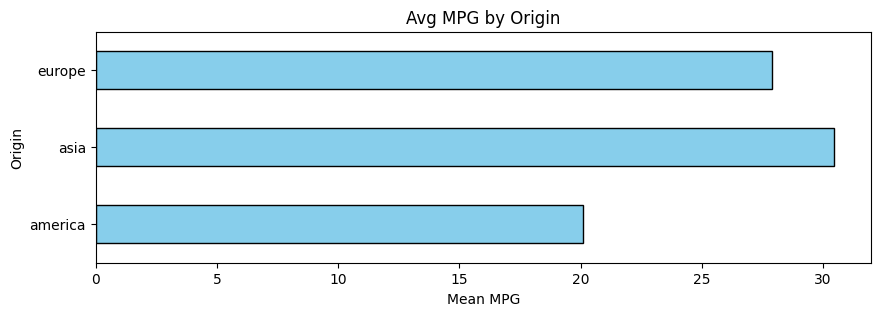

In [ ]:
# Plot distribution of origin with mpg
mean_mpg_by_origin = data.groupby('origin')['mpg'].mean()
plt.figure(figsize=(10, 3))
mean_mpg_by_origin.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Mean MPG')
plt.ylabel('Origin')
plt.title('Avg MPG by Origin')
plt.show()

In [ ]:
#Apply one-hot encoding to 'origin' column
data = pd.get_dummies(data, columns=['origin'])
data

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,True,False,False
394,44.0,4,97.0,52,2130,24.6,82,1,False,False,True
395,32.0,4,135.0,84,2295,11.6,82,1,True,False,False
396,28.0,4,120.0,79,2625,18.6,82,1,True,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_america  398 non-null    bool   
 9   origin_asia     398 non-null    bool   
 10  origin_europe   398 non-null    bool   
dtypes: bool(3), float64(3), int64(4), object(1)
memory usage: 26.2+ KB


In [ ]:
#Replace '?' with nan and remove the records from the data frame that have "nan"
data = data.replace('?', np.nan)

#Fill nan with median values
data = data.apply(lambda x: x.fillna(x.median()),axis=0)

In [ ]:
# Convert 'hp' and origin columns to float64 type
data[['hp', 'origin_america', 'origin_asia', 'origin_europe']] = data[['hp', 'origin_america', 'origin_asia', 'origin_europe']].astype('float64')

In [ ]:
#Lets analysze the distribution of the dependent (mpg) column
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [ ]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1.0,0.0,0.0


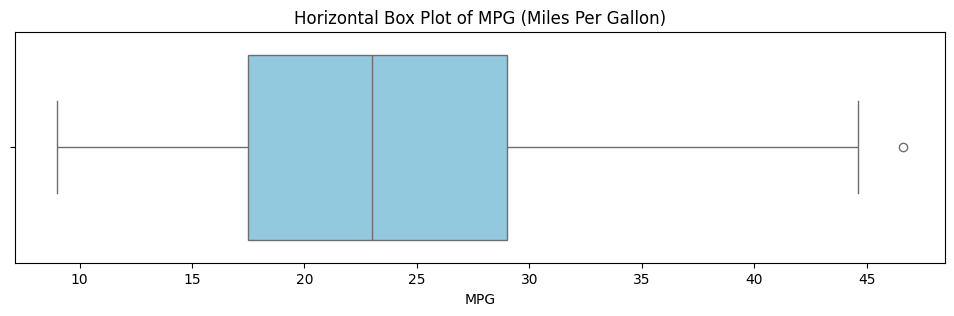

In [ ]:
#Horizontal box plot showing distribution of mpg
plt.figure(figsize=(12, 3))
sns.boxplot(x=data['mpg'], color='skyblue')
plt.title('Horizontal Box Plot of MPG (Miles Per Gallon)')
plt.xlabel('MPG')
plt.show()

In [ ]:
#Replace outlier with mean value
mean_mpg = data['mpg'].mean()
data.loc[data['mpg'] > 45, 'mpg'] = mean_mpg

# Correlation Analysis

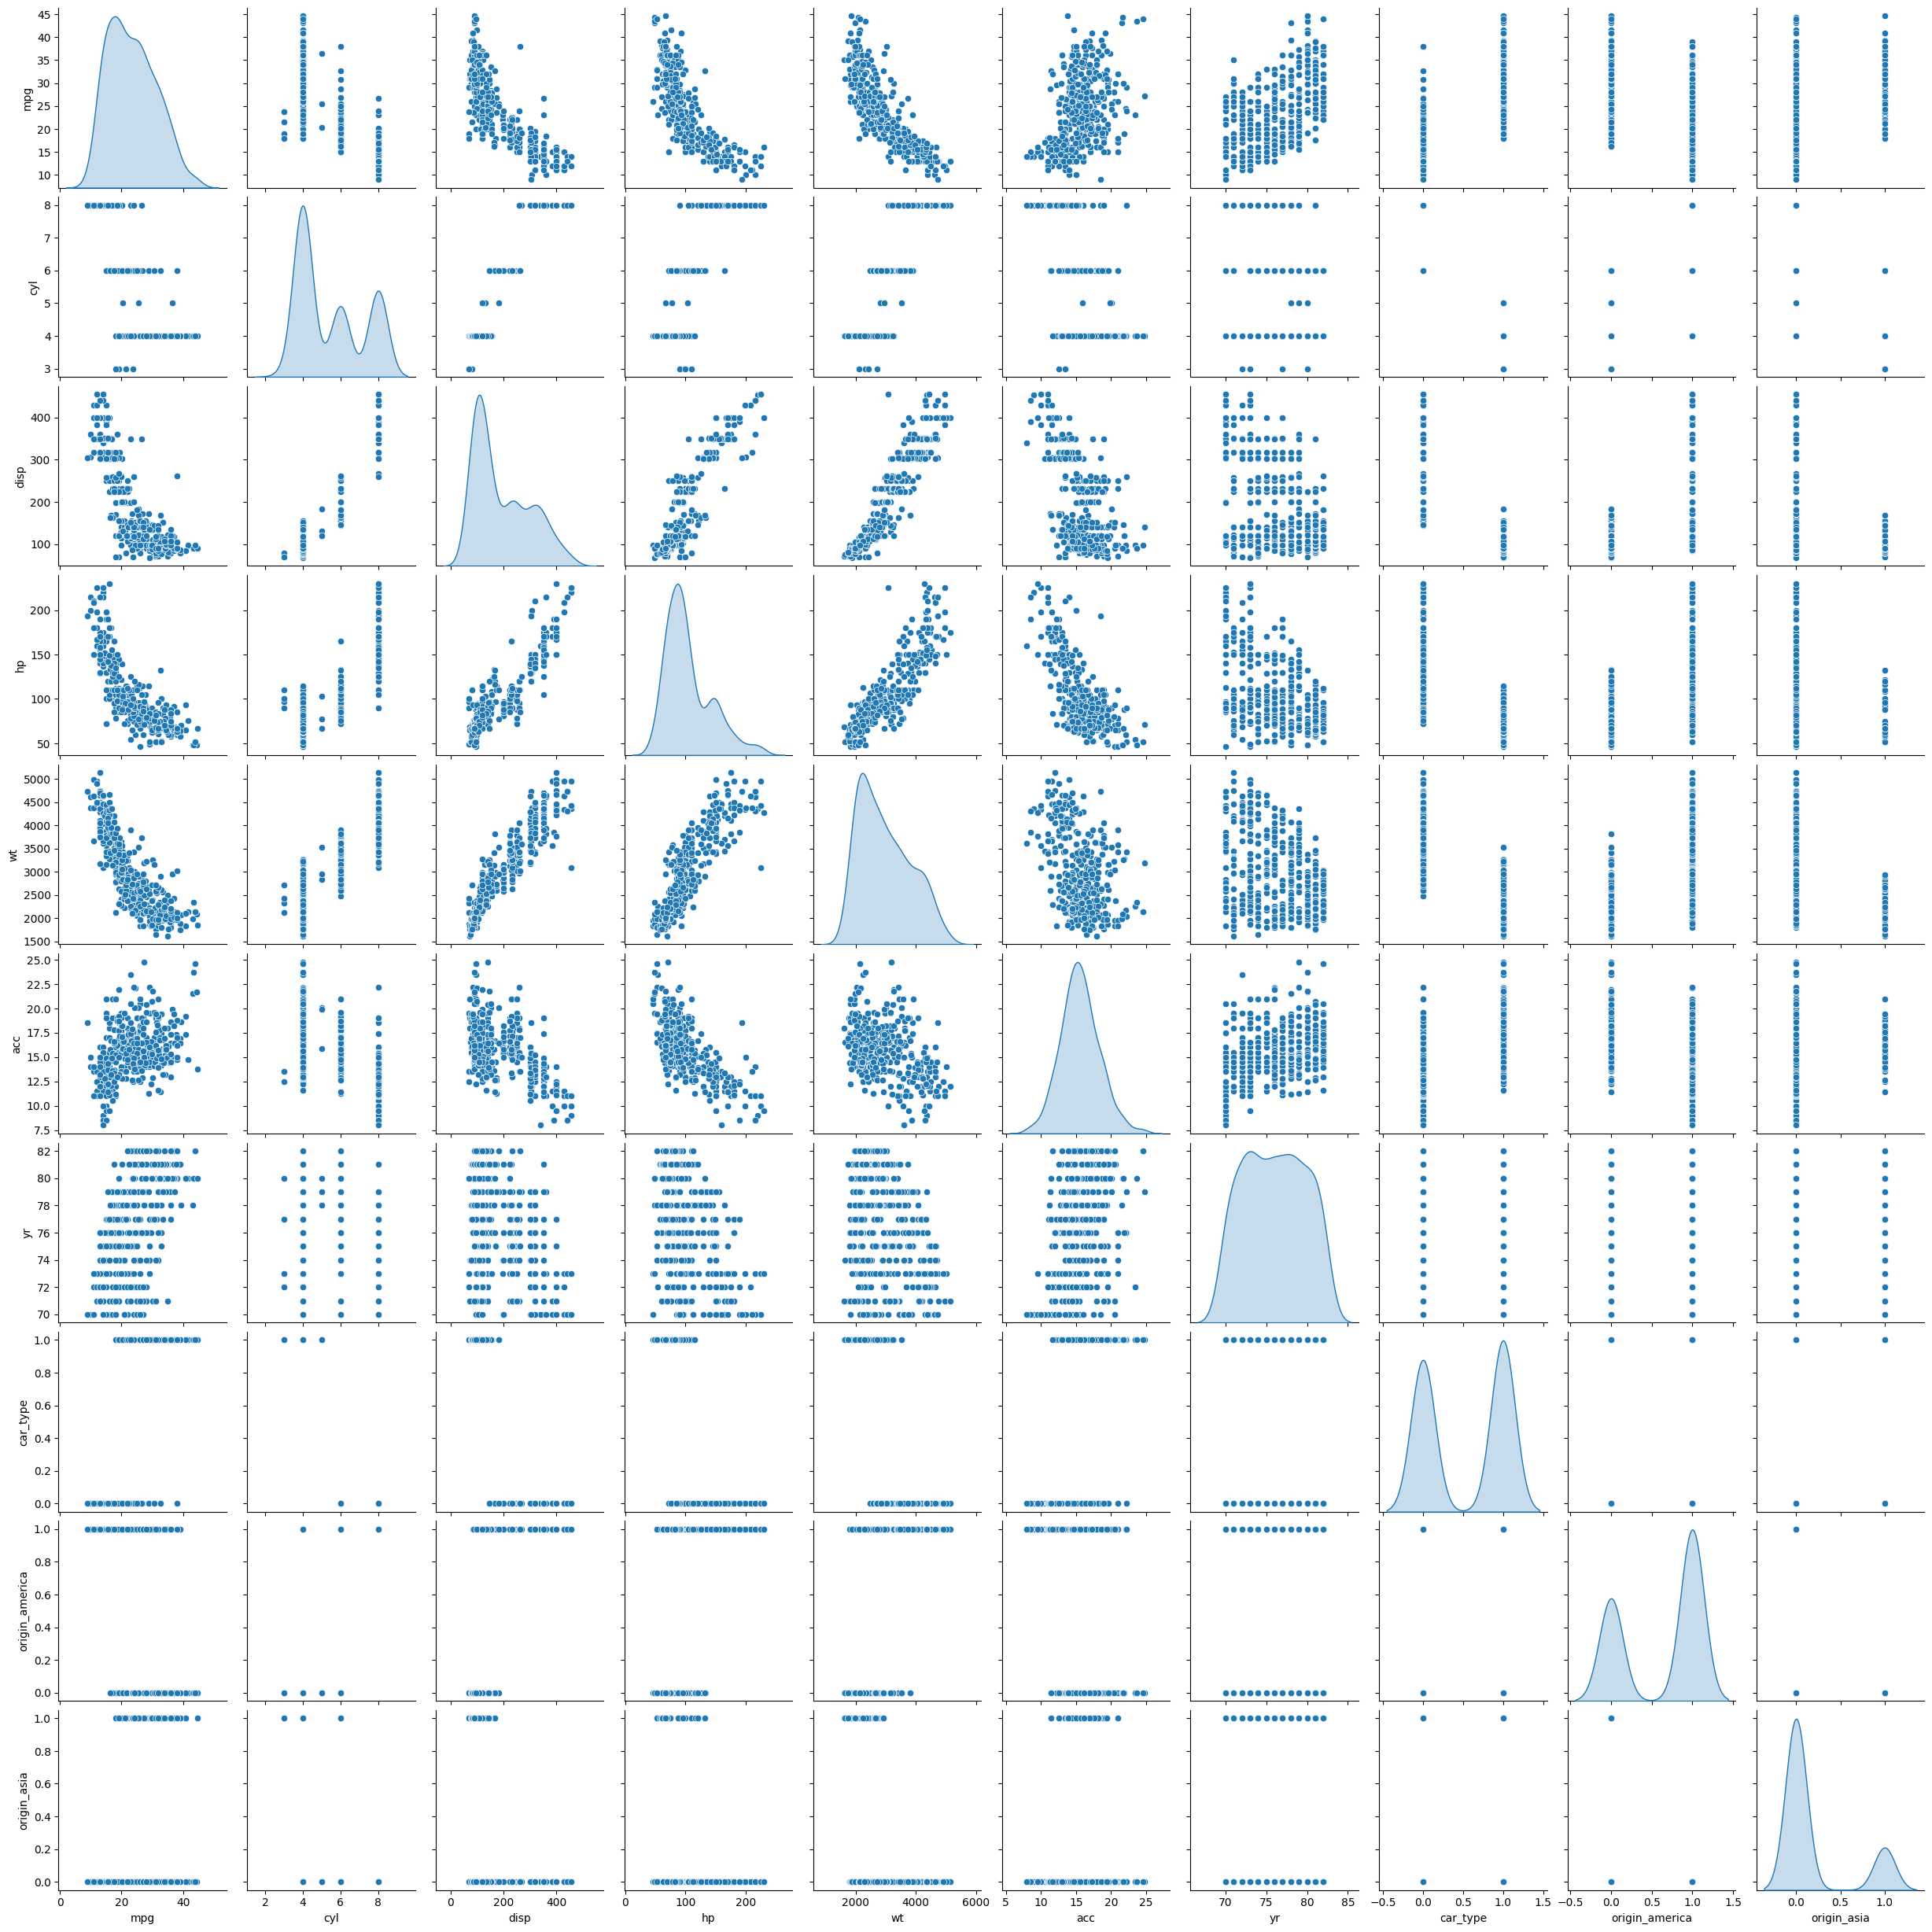

In [ ]:
#Scatter Matrix
data_attr = data.iloc[:, 0:10]
sns.pairplot(data_attr, diag_kind='kde')

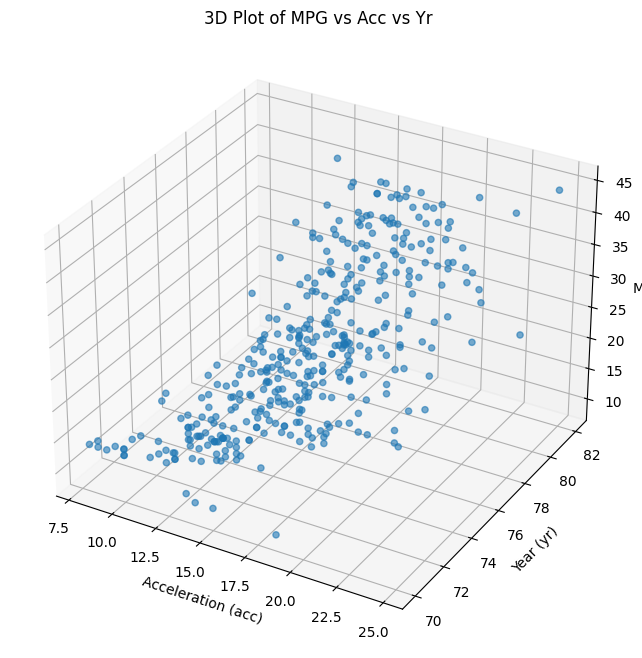

In [ ]:
# Create a 3D figure for mpg Vs acc & yr
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['acc'], data['yr'], data['mpg'], marker='o', alpha=0.6)
ax.set_xlabel('Acceleration (acc)')
ax.set_ylabel('Year (yr)')
ax.set_zlabel('MPG')
ax.set_title('3D Plot of MPG vs Acc vs Yr')
plt.show()

<Axes: >

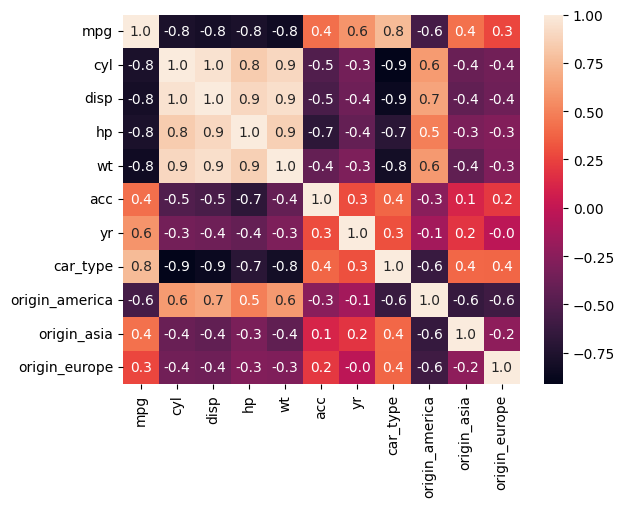

In [ ]:
# Heatmap
sns.heatmap(data.corr(), annot=True, fmt='.1f')

In [ ]:
# Declare X features and y target
X = data.drop('mpg', axis=1)
y = data['mpg']

In [ ]:
# Split X and y into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Linear Regression Model training and Evaluation

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cyl is 1.3573380013684302
The coefficient for disp is 0.02414377732819358
The coefficient for hp is -0.044929200049355286
The coefficient for wt is -0.006550505977750852
The coefficient for acc is 0.02291013039102997
The coefficient for yr is 0.778096425345386
The coefficient for car_type is 5.7369063065911785
The coefficient for origin_america is -1.2798397138823445
The coefficient for origin_asia is 0.3730229060903544
The coefficient for origin_europe is 0.9068168077919845


In [ ]:
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -26.325332441083066


In [ ]:
# Model score - R2 or coeff of determinant
regression_model.score(X_test, y_test)

0.8514602924046943

Since on many dimensions, the relationship is not really linear, let us try polynomial models (quadratic)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming X_train, X_test, y_train, and y_test are defined earlier

# Create PolynomialFeatures object with interaction_only=True
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Transform X_train and X_test
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.transform(X_test)  # Use transform instead of fit_transform for test data

# Create and fit LinearRegression model
poly_clf = LinearRegression()
poly_clf.fit(X_train_, y_train)

# Predict on test data
y_pred = poly_clf.predict(X_test_)

# Print the R^2 score of the model on test data
print(poly_clf.score(X_test_, y_test))

0.8623699201141076


In [ ]:
print(X.shape)
print(X_train_.shape)
poly

(398, 10)
(278, 56)


PolynomialFeatures(interaction_only=True)